In [208]:
import numpy as np
import scipy.io
import scipy.optimize

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [174]:
data=scipy.io.loadmat('ex5data1.mat')
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']
Xtest=data['Xtest']
ytest=data['ytest']

m,n=X.shape
X=np.hstack((np.ones((m,1)),X))
init_theta=np.ones(n+1)

In [158]:

def linear_regression_reg_cost(theta,X,y,lmbda=0):
    ''' theta is (n+1,)
    X is (m x n+1)
    y is m x 1
    '''
    
    m,n=X.shape
    
    
    theta=theta.reshape((n,1))
    hx=np.dot(X,theta)
    
    cost=0.5*np.mean(np.square(hx-y))+(lmbda/2*m)*np.sum(np.square(theta[1:]))
    return cost

linear_regression_reg_cost(init_theta,X,y)
    

303.95152555359761

In [187]:
def linear_regression_reg_gradient(theta,X,y,lmbda=0):
    ''' theta is (n+1,)
    X is (m x n+1)
    y is m x 1
    '''
    
    m,n=X.shape
    
    theta=theta.reshape((n,1))
    hx=np.dot(X,theta)
    
    cost_term=(1./m)*(np.dot(X.T,(hx-y)))
    reg_term=(lmbda/m)*theta
    reg_term[0]=0  #the bias coeffecient has no regularization
    
    #reshaping to convert the output to a numpy ndarray , which is needed by the optimisation routine
    #return (cost_term+reg_term).reshape(-1)
    final=cost_term+reg_term
    return np.squeeze(np.asarray(final))

print linear_regression_reg_gradient(init_theta,X,y,1).shape
print init_theta.shape

    

(2,)
(2,)


In [228]:
def findMinTheta(init_theta,X,y,lmbda):
    '''
    for the optimization routine to work properly
    
    1. cost function should return a number
    2. the initial starting point theta in my case has to be a ndarray    use .reshape(-1) for ndarray conversion
    3. the fprint also has to be a ndarray
    4. the args can be of any type must be consistent with the type assumed in the cost and gradient function
    5. the biggest source of error when working with the optimisation routine is that it assumes that the fprime 
    returns a ndarray and the initial x0 is also an ndarray. the error message python gives is that matrices are not
    alligned so i have to check the x0 and return shape of fprime
    '''
    
    init_theta=init_theta.reshape(-1)
    #print init_theta.shape
    final_theta=scipy.optimize.fmin_cg(linear_regression_reg_cost,init_theta,fprime=linear_regression_reg_gradient,args=(X,y,lmbda),disp=False)
    return final_theta
                                       
findMinTheta(init_theta,X,y,0)

array([ 13.08790734,   0.36777925])

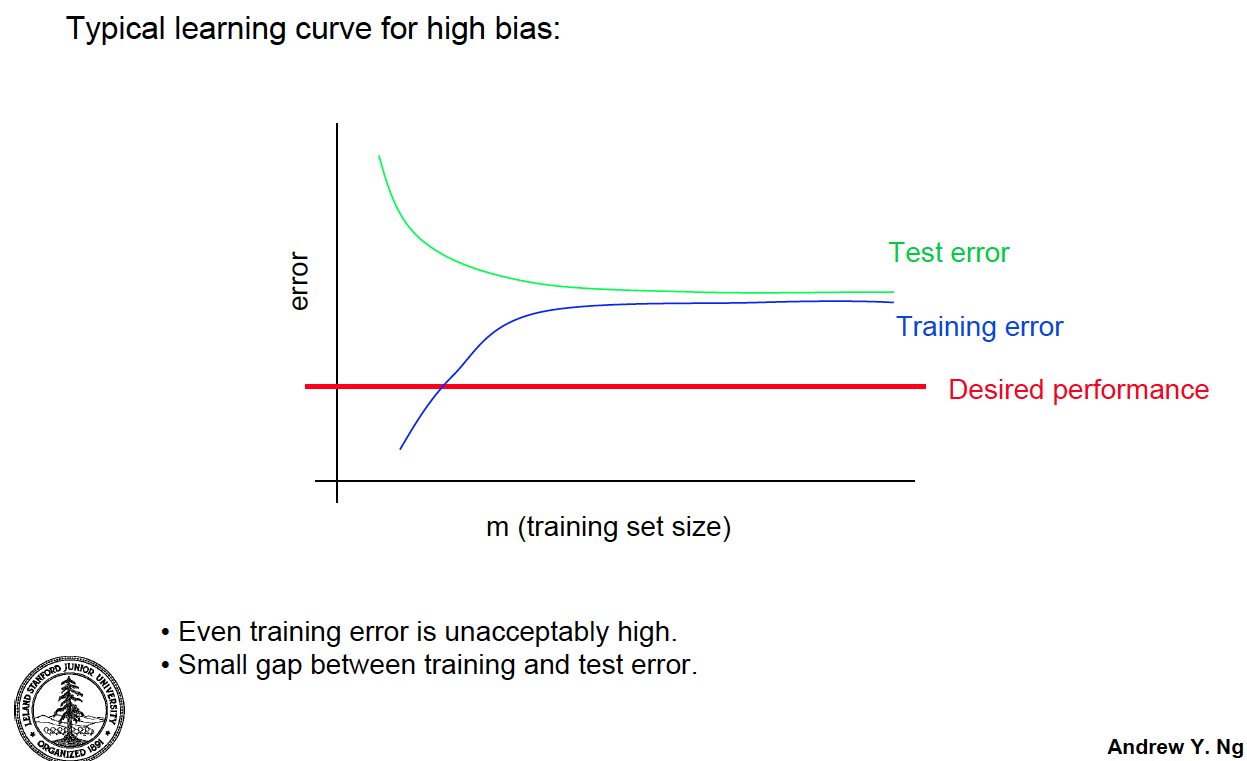

In [238]:
from IPython.display import Image
Image(filename='high_bias.png',width=600,height=800)

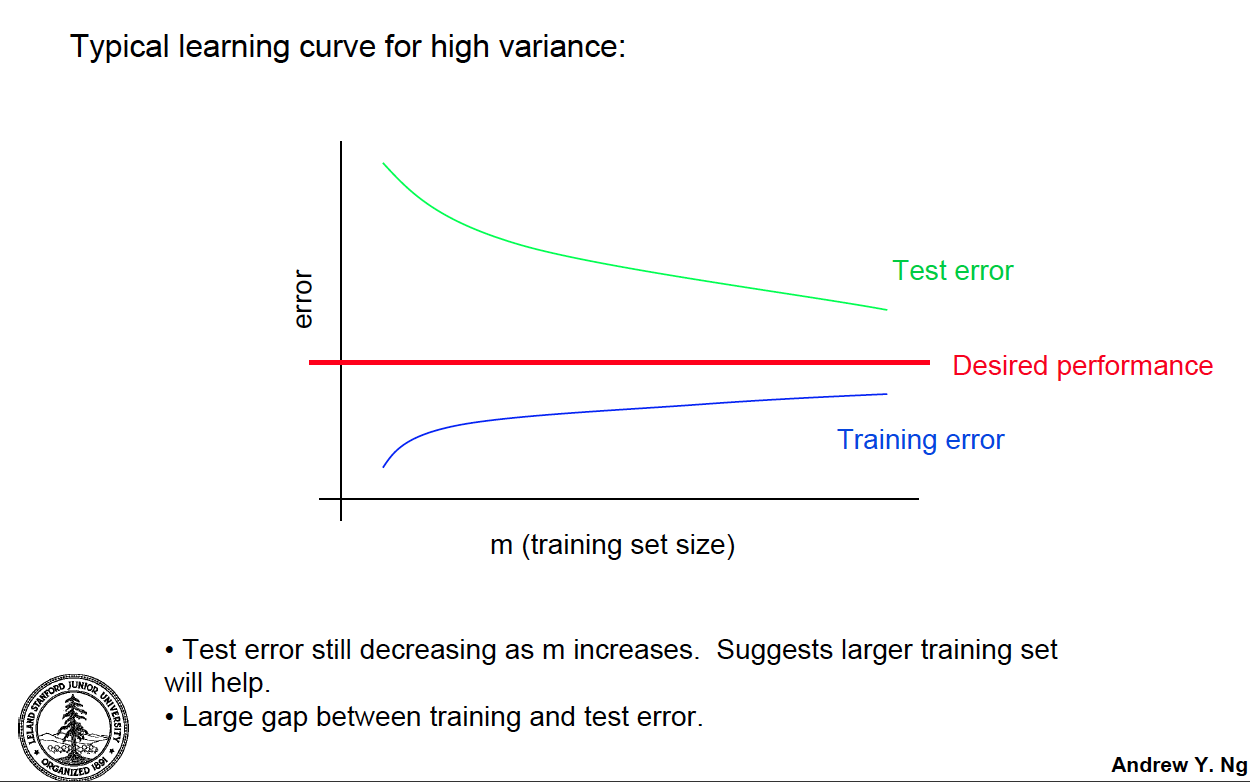

In [237]:
Image(filename='high_variance.png',width=600,height=800)

In [231]:
'''To plot the learning curve, we need a training and cross validation set
error for different training set sizes. To obtain dierent training set sizes,
you should use different subsets of the original training set X.

notice that the validation dataset remains the same, i am just changing the training data size and getting the theta
once i have the theta then i am getting the training and validation error for those values of theta


'''


def learning_curve(X,y,Xval,yval):
    train_error=[]
    validation_error=[]
    
    #adding an extra columns of 1 to the validation input
    
    m,n=Xval.shape
    
    Xval=np.hstack((np.ones((m,1)),Xval))
    
    for i in range(1,13):
        train_X_subset=X[:i]
        train_y_subset=y[:i]
        
        #the theta for the given training size
        
        theta=findMinTheta(init_theta,train_X_subset,train_y_subset,10)
    
            
        train_cost=linear_regression_reg_cost(theta,train_X_subset,train_y_subset,10)
        train_error.append(train_cost)
        
        validation_cost=linear_regression_reg_cost(theta,Xval,yval,10)
        validation_error.append(validation_cost)
    return train_error,validation_error

train_error,validation_error=learning_curve(X,y,Xval,yval)
        

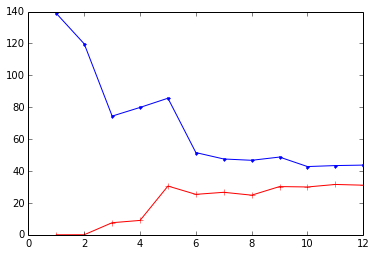

In [232]:
plt.plot(range(1,13),train_error,'r+-',label='train error')
plt.plot(range(1,13),validation_error,'b.-')


#this is a classic case of high variance algo, this means that the 

In [233]:
#when i am indexing the data as  X[:,0] then the output is a ndarray. so if i want to work with matrices then
# np.asmatrix(X[:,0],


#np.power for raising all the elemnets of an array or matrix to a specefic power

#np.column_stack for cbind

#for cbind all the elems must be a 2D matrix 

def feature_mapping(X,p=8):
    m,n=X.shape
    data=np.transpose(np.asmatrix(X[:,1]))  # now the data is in m x 1 format
    final=data
    for i in range(2,p+1):
        final=np.column_stack((final,np.power(data,i)))
        
    #normalizing the features
    mn=np.mean(final,axis=0)
    std=np.std(final,axis=0)
    
    final=(final-mn)/std 
    
    #adding extra columns of 1's
    final=np.column_stack((np.transpose(np.asmatrix(X[:,0])),final))

    return final

temp=feature_mapping(X)
        

For this part of the exercise, you will be using a polynomial of degree 8.
It turns out that if we run the training directly on the projected data, will
not work well as the features would be badly scaled (e.g., an example with
x = 40 will now have a feature x8 = 408 = 6:5  1012). Therefore, you will
need to use feature normalization.

In [235]:
#init_theta=np.ones(X.shape[1]
#findMinTheta(init_theta1,temp,y,0)
print linear_regression_reg_cost(init_theta1,temp,y).shape
print linear_regression_reg_gradient(init_theta1,temp,y).shape


#doing cross validation to select the value of lambda
final_lmbda=[]
for i in np.logspace(0,4,20):
    #print i
    theta=scipy.optimize.fmin_cg(linear_regression_reg_cost,x0=init_theta1,fprime=linear_regression_reg_gradient,args=(temp,y,0),disp=False)
    cost=linear_regression_reg_cost(theta,temp,y,i)
    final_lmbda.append((cost,i))


()
(9,)


In [236]:
#finding the best value of lambda
#the optimize routine use randomness so

min(final_lmbda,key=lambda x:x[0])


#do the best value of lambda is 1.0

(69769.624114377148, 1.0)